### Importing Necessary library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans,DBSCAN,AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
airline_data = pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')
airline_data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


### Data Understanding

In [3]:
del airline_data['ID#']

In [4]:
airline_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


### Model building

In [5]:
std_scale = StandardScaler()
scaled_df = std_scale.fit_transform(airline_data)
scaled_df = pd.DataFrame(scaled_df,columns=airline_data.columns)
scaled_df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918
...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1.303918
3995,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1.303918
3996,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1.303918
3997,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,-0.766919


### Finding optimal number of K

In [6]:
wcss = []
for i in range(1,11):
    kmean_model = KMeans(n_clusters=i)
    kmean_model.fit_predict(scaled_df)
    wcss.append(kmean_model.inertia_)

In [7]:
wcss

[43989.000000000095,
 35409.51662986136,
 30899.216408790628,
 27154.035327088164,
 25179.9049563279,
 21470.93959900209,
 18893.59434829801,
 17316.78205595397,
 15966.023853642984,
 14727.935166347457]

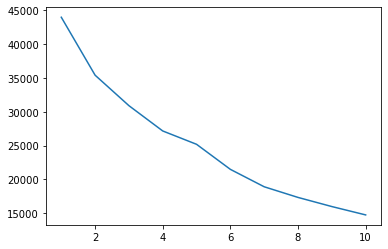

In [38]:
plt.plot(range(1,11),wcss)
plt.show()

#### Building Model K = 2

In [9]:
kmean_cluster = KMeans(n_clusters=2,).fit_predict(scaled_df)

In [10]:
airline_data['cluster_k2'] = kmean_cluster
airline_data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster_k2
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,1


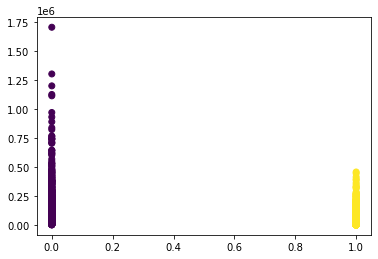

In [11]:
plt.scatter(airline_data['cluster_k2'],airline_data['Balance'],c=airline_data['cluster_k2'])
plt.show()

### Using Hierarichal clustering

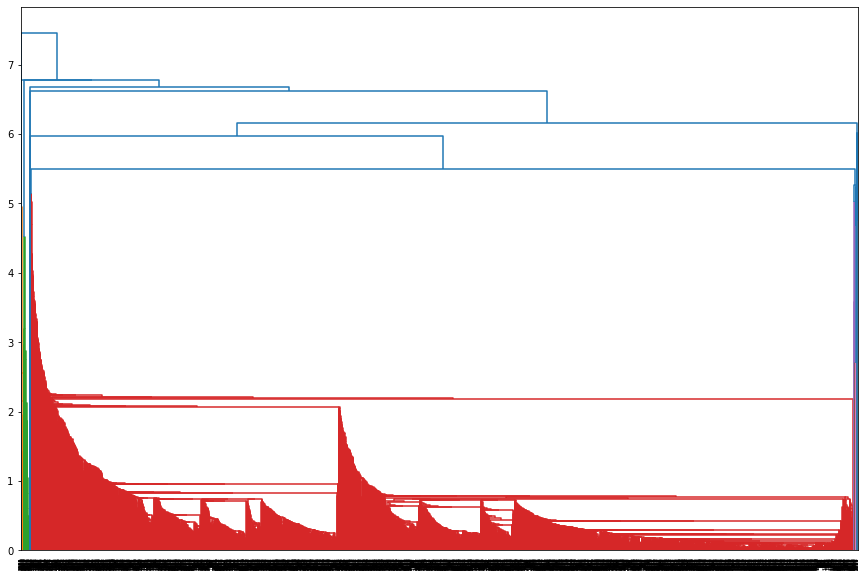

In [40]:
plt.figure(figsize=(15,10))
dendogram = sch.dendrogram(sch.linkage(scaled_df,'single'))
plt.show()

In [13]:
h_cluster = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='single')

In [14]:
y_pred = h_cluster.fit_predict(scaled_df)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [15]:
cluster_hc = pd.DataFrame(y_pred,columns=['cluster_hc'])
cluster_hc

,cluster_hc
0,0
1,0
2,0
3,0
4,0
...,...
3994,0
3995,0
3996,0
3997,0


In [16]:
cluster_hc.value_counts()

cluster_hc
0             3998
1                1
dtype: int64

In [17]:
airline_data['cluster_hc'] = cluster_hc

In [18]:
airline_data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster_k2,cluster_hc
0,28143,0,1,1,1,174,1,0,0,7000,0,1,0
1,19244,0,1,1,1,215,2,0,0,6968,0,1,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,1,0
3,14776,0,1,1,1,500,1,0,0,6952,0,1,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,1,0


In [19]:
airline_data[airline_data['cluster_hc'] == 0]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster_k2,cluster_hc
0,28143,0,1,1,1,174,1,0,0,7000,0,1,0
1,19244,0,1,1,1,215,2,0,0,6968,0,1,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,1,0
3,14776,0,1,1,1,500,1,0,0,6952,0,1,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,1,0


In [20]:
airline_data[airline_data['cluster_hc'] == 1]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster_k2,cluster_hc
3583,160114,500,1,1,1,71954,86,30817,53,1373,1,0,1


### Use DBSCAN

In [21]:
dbscan = DBSCAN(eps=1,min_samples=5)
y_pred_db = dbscan.fit_predict(scaled_df)
y_pred_db

array([0, 0, 0, ..., 1, 0, 0])

In [22]:
airline_data['cluster_db'] = y_pred_db

In [23]:
airline_data.cluster_db.unique()

array([ 0,  1, -1,  2,  3,  4,  5])

In [24]:
airline_data.cluster_db.value_counts()

 0    2319
 1    1093
-1     554
 2      13
 5       9
 3       6
 4       5
Name: cluster_db, dtype: int64

In [29]:
airline_data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster_k2,cluster_hc,cluster_db
0,28143,0,1,1,1,174,1,0,0,7000,0,1,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,1,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,1,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,1,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1,0,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1,0,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1,0,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,1,0,0


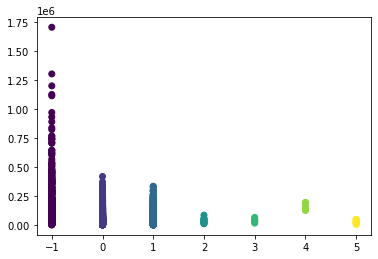

In [34]:
plt.scatter(airline_data['cluster_db'],airline_data['Balance'],c=airline_data['cluster_db'])
plt.show()